
# Trabajo práctico integrador
# Análisis de datos 

## Authors:
- Karen Raczkowski
- Juan Ignacio Ribet
- FS


### Librerías

In [5]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import plotly.express as px

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Esquemas de entrenamiento
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

from functools import reduce

# LEGO Database

- Preguntas interesantes para considerar aquí:
    - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
    - ¿Existe alguna asociación entre los colores y las temáticas?
    - ¿Podría predecir a que temática pertenece un set basado en el contenido de este? (recomendado)
    - A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más raras?

![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

In [6]:
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

In [129]:
themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)

In [58]:
# Opcional: correr esto si arriba da SSLCertVerificationError

import urllib.request
import gzip
import ssl

# Create an SSL context with certificate verification disabled
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the URLs of the datasets
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets = 'https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

try:
    # Read the compressed CSV data with SSL context
    themes_data = urllib.request.urlopen(url_themes, context=ssl_context)
    colors_data = urllib.request.urlopen(url_colors, context=ssl_context)
    part_categories_data = urllib.request.urlopen(url_part_categories, context=ssl_context)
    parts_data = urllib.request.urlopen(url_parts, context=ssl_context)
    part_relationships_data = urllib.request.urlopen(url_part_relationships, context=ssl_context)
    elements_data = urllib.request.urlopen(url_elements, context=ssl_context)
    sets_data = urllib.request.urlopen(url_sets, context=ssl_context)
    minifigs_data = urllib.request.urlopen(url_minifigs, context=ssl_context)
    inventories_data = urllib.request.urlopen(url_inventories, context=ssl_context)
    inventory_parts_data = urllib.request.urlopen(url_inventory_parts, context=ssl_context)
    inventory_sets_data = urllib.request.urlopen(url_inventory_sets, context=ssl_context)
    inventory_minifigs_data = urllib.request.urlopen(url_inventory_minifigs, context=ssl_context)

    # Decompress the data and read into DataFrames
    themes = pd.read_csv(gzip.GzipFile(fileobj=themes_data), delimiter=',')
    colors = pd.read_csv(gzip.GzipFile(fileobj=colors_data), delimiter=',')
    part_categories = pd.read_csv(gzip.GzipFile(fileobj=part_categories_data), delimiter=',')
    parts = pd.read_csv(gzip.GzipFile(fileobj=parts_data), delimiter=',')
    part_relationships = pd.read_csv(gzip.GzipFile(fileobj=part_relationships_data), delimiter=',')
    elements = pd.read_csv(gzip.GzipFile(fileobj=elements_data), delimiter=',')
    sets = pd.read_csv(gzip.GzipFile(fileobj=sets_data), delimiter=',')
    minifigs = pd.read_csv(gzip.GzipFile(fileobj=minifigs_data), delimiter=',')
    inventories = pd.read_csv(gzip.GzipFile(fileobj=inventories_data), delimiter=',')
    inventory_parts = pd.read_csv(gzip.GzipFile(fileobj=inventory_parts_data), delimiter=',')
    inventory_sets = pd.read_csv(gzip.GzipFile(fileobj=inventory_sets_data), delimiter=',')
    inventory_minifigs = pd.read_csv(gzip.GzipFile(fileobj=inventory_minifigs_data), delimiter=',')                                           

except urllib.error.URLError as e:
    print("An error occurred while accessing the URL:", e)

Themes: Este dataset incluye información sobre temas de Lego. Cada tema recibe un número de identificación único ("id"), un nombre ("name") y (si es parte de un tema más grande) de qué tema es parte ("parent_id").

In [8]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [9]:
#Checking null data
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

Colors: Esta data contiene información sobre los colores de LEGO, incluida una identificación única para cada color ("id"), su nombre ("name") y el valor RGB aproximado ("rgb"), y si es transparente ("is_trans").

In [10]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [12]:
#Checking null data
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

Part_categories: Este dataset incluye información sobre la categoría de la pieza ("name") y una identificación única para esa categoría de pieza ("id").

In [13]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [14]:
#Checking null data
part_categories.isnull().sum()

id      0
name    0
dtype: int64

Parts: Este dataset incluye información sobre piezas de lego, incluido un número de identificación único para cada pieza ("part_num"), el nombre de la pieza ("name"), la categoría de la que proviene ("part_cat_id") y su material ("part_material").

In [15]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [16]:
#Checking null data 
parts.isnull().sum()

part_num         0
name             0
part_cat_id      0
part_material    0
dtype: int64

Part_relationships: Este dataset incluye información sobre las diferentes relaciones de las partes. 

In [17]:
part_relationships.head()

,rel_type,child_part_num,parent_part_num
0,P,3626cpr3662,3626c
1,P,87079pr9974,87079
2,P,3960pr9971,3960
3,R,98653pr0003,98086pr0003
4,R,98653pr0003,98088pat0003


In [18]:
#Checking null data
part_relationships.isnull().sum()

rel_type           0
child_part_num     0
parent_part_num    0
dtype: int64

Elements

In [19]:
elements.head()

,element_id,part_num,color_id,design_id
0,6300211,67906c01,14,67908.0
1,4566309,2564,0,2564.0
2,4275423,53657,1004,53657.0
3,6194308,92926,71,28967.0
4,6229123,26561,4,26561.0


In [20]:
#Checking null data
elements.isna().sum()

element_id        0
part_num          0
color_id          0
design_id     21855
dtype: int64

Sets: Este archivo contiene información sobre los sets de LEGO, incluido un número de identificación único para cada set ("set_num"), el nombre del set ("name"), el año en que se lanzó ("year"), su tema ("theme_id"), cuántas partes incluye ("num_parts") y URL que contienen fotos de cada set ("img_url").

In [21]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [22]:
#Checking null data
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

Minifigs

In [23]:
minifigs.head()

,fig_num,name,num_parts,img_url
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...


In [24]:
#Checking null data
minifigs.isnull().sum()

fig_num      0
name         0
num_parts    0
img_url      0
dtype: int64

Inventories: Esta tabla contiene información sobre inventarios, incluida una identificación única ("id"), su versión ("version") y el número del set ("set_num").

In [25]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [26]:
#Checking null data
inventories.isnull().sum()

id         0
version    0
set_num    0
dtype: int64

Inventory_parts: Este dataset contiene información sobre los inventarios de piezas, incluido un número de identificación único ("inventory_id"), el número de pieza ("part_num"), el color de la pieza ("color_id"), cuántas de ellas se incluyen ("quantity") y si se trata de un repuesto ("is_spare").

In [27]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [28]:
#Checking null data
inventory_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         8213
dtype: int64

Inventory_sets: Este dataset contiene información sobre qué inventario se incluye en qué conjuntos, incluido el ID de inventario ("inventory_id"), el número de set ("set_num") y la cantidad de ese inventario que se incluye ("quantity").

In [29]:
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [30]:
#Checking null data
inventory_sets.isnull().sum()

inventory_id    0
set_num         0
quantity        0
dtype: int64

Inventory_minifigs

In [31]:
inventory_minifigs.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


In [32]:
#Checking null data
inventory_minifigs.isnull().sum()

inventory_id    0
fig_num         0
quantity        0
dtype: int64

## ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

In [33]:
year = sets['year'].sort_values().unique()

#Calculate the 'num_parts' mean of each year 
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)

In [34]:
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,284.0


In [35]:
sets_size_evolution.describe().round(0)

,sets_mean_size
count,73.0
mean,113.0
std,58.0
min,1.0
25%,81.0
50%,106.0
75%,150.0
max,284.0


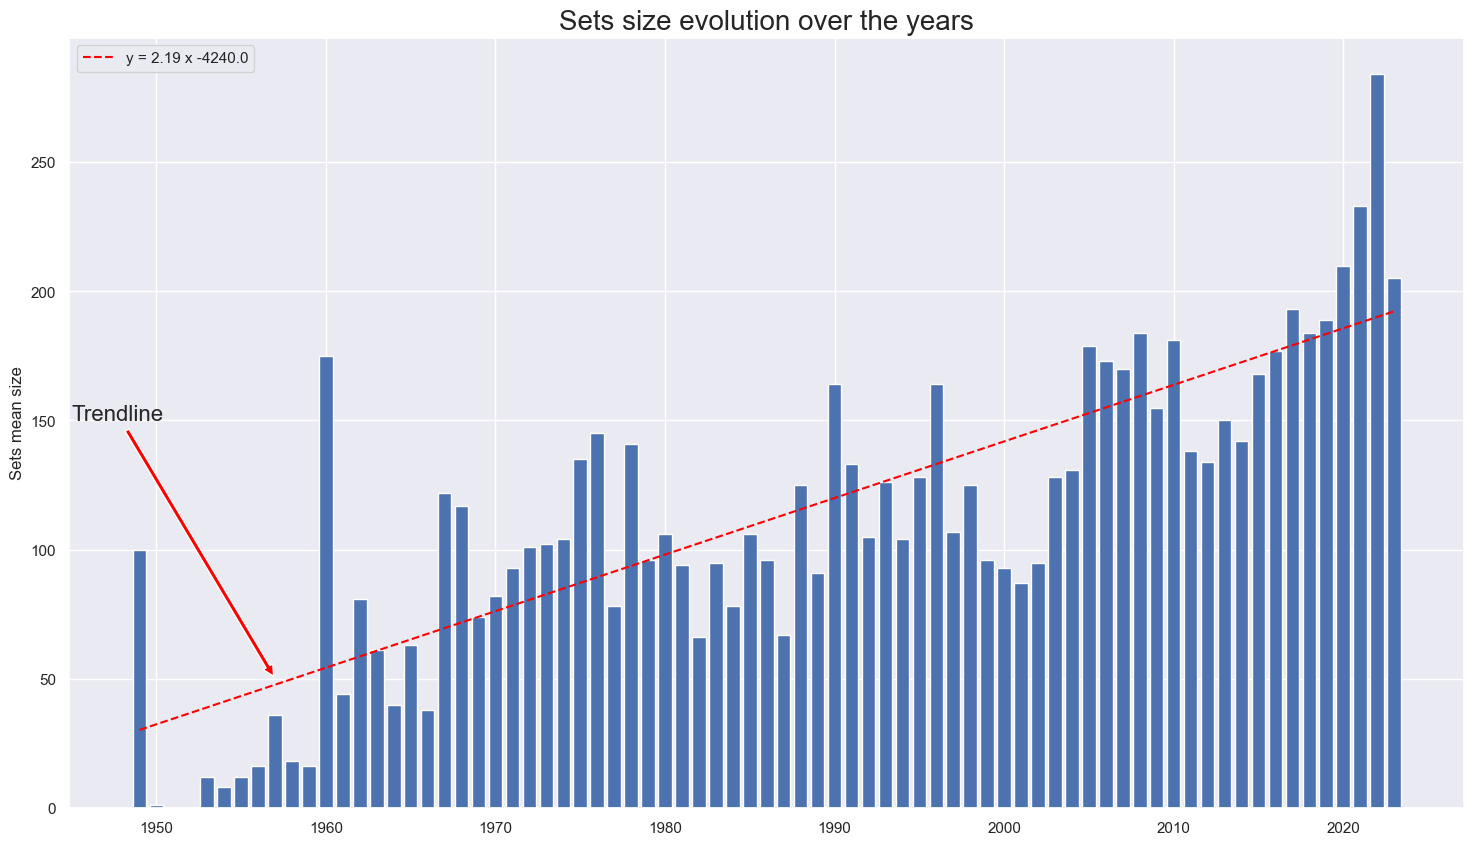

In [42]:
z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Sets mean size')
ax.plot(year, p(year), c='red', linestyle='dashed', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Sets size evolution over the years',fontsize=20)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=16, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

## ¿Existe alguna asociación entre los colores y las temáticas?

In [43]:
#Change names of the columns 'id' and 'name' for 'theme_id' and 'theme_name' in the themes set
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)
themes.head()

,theme_id,theme_name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [44]:
#Merge the datasets 'sets' with 'themes' by the column "theme_id" in the set 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,theme_name,parent_id
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic,NaN
...,...,...,...,...,...,...,...,...
21233,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,Modulex,NaN
21234,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21235,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21236,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,Modulex,NaN


In [45]:
#Delete the columns 'img_url' and 'parent_id' of the set 'sets_themes'
sets_themes = sets_themes.drop(columns=['img_url','parent_id'])
sets_themes

,set_num,name,year,theme_id,num_parts,theme_name
0,001-1,Gears,1965,1,43,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic
4,1039-1,Manual Control Set 1,1986,1,39,Technic
...,...,...,...,...,...,...
21233,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,Modulex
21234,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,Modulex
21235,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,Modulex
21236,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,Modulex


In [46]:
#Merge the datasets 'sets_themes' with 'inventories' by the column "set_num"
sets_themes_inv = pd.merge(inventories, sets_themes,  on="set_num")
sets_themes_inv

,id,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,3,1,3931-1,Emma's Splash Pool,2012,494,43,Friends
2,4,1,6942-1,Zo Weevil,1999,134,20,Insectoids
3,15,1,5158-1,"T-Junction, Circle Plates",1990,443,2,Service Packs
4,16,1,903-1,Train Wheels and Couplers,1969,371,10,Supplemental
...,...,...,...,...,...,...,...,...
22847,177342,1,76264-1,Batmobile Pursuit: Batman vs. The Joker,2023,697,0,Batman
22848,177343,1,76265-1,Batwing: Batman vs. The Joker,2023,697,0,Batman
22849,177344,1,76266-1,Endgame Final Battle,2023,702,0,Avengers
22850,177346,1,76224-1,Batmobile: Batman vs. The Joker Chase,2023,697,0,Batman


In [47]:
#Change names of the columns 'inventory_id' for 'id' in the 'inventory_parts' set
inventory_parts.rename(columns = {'inventory_id':'id'}, inplace = True)
inventory_parts

,id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN
...,...,...,...,...,...,...
1126613,177313,99780,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1126614,177321,3626cpr2522,14,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1126615,177321,3833,4,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1126616,177321,970c24,379,1,f,https://cdn.rebrickable.com/media/parts/elemen...


In [48]:
#Merge the datasets 'inventory_parts' with 'sets_themes_inv' by the column "id"
result = pd.merge(inventory_parts, sets_themes_inv, on="id")
result

,id,part_num,color_id,quantity,is_spare,img_url,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
2,1,stickerupn0077,9999,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
3,1,upn0342,0,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
4,1,upn0350,25,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065225,177313,44861,0,2,f,https://cdn.rebrickable.com/media/parts/elemen...,1,952306-1,Service Car,2023,63,25,Traffic
1065226,177313,64450,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...,1,952306-1,Service Car,2023,63,25,Traffic
1065227,177313,67687,71,2,f,https://cdn.rebrickable.com/media/parts/elemen...,1,952306-1,Service Car,2023,63,25,Traffic
1065228,177313,87414,0,4,f,https://cdn.rebrickable.com/media/parts/elemen...,1,952306-1,Service Car,2023,63,25,Traffic


In [49]:
#Delete the columns 'quantity', 'is_spare' and 'img_url' of the set 'result'
result = result.drop(columns=['quantity','is_spare','img_url'])
result.head()

,id,part_num,color_id,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,48379c01,72,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,1,48395,7,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
2,1,stickerupn0077,9999,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
3,1,upn0342,0,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
4,1,upn0350,25,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games


In [50]:
#create the data set 'Theme_color'
Theme_color = result[['color_id', 'theme_name']]

In [51]:
#group the 'Theme_color' dataset by the 'theme_name' and count the quantity of diferente colors of the parts
colors_themes = pd.DataFrame(Theme_color.groupby(by='theme_name').apply(lambda x: x['color_id'].value_counts()))
colors_themes

count
theme_name color_id       
12V        0           602
           7           346
           4           308
           15          119
           14          119
...                    ...
eLAB       2             5
           15            4
           288           3
           19            1
           47            1

[11023 rows x 1 columns]

In [52]:
#Create a dic with the keys:'theme name' and value:'most common color of the theme' 
first_color_theme={}
for i in Theme_color['theme_name'].unique():
    first_color_theme[i] = colors_themes.loc[i].iloc[0][0]
first_color_theme

{'Gravity Games': 59,
 'Friends': 10949,
 'Insectoids': 233,
 'Service Packs': 682,
 'Supplemental': 828,
 'Creator': 1782,
 'Bulk Bricks': 79,
 'Star Wars': 17750,
 'Disney Series 1': 18,
 'Town Jr.': 420,
 'Desert': 329,
 'Police': 2971,
 'Train': 249,
 'Classic Town': 5396,
 'The LEGO Batman Movie Series 1': 25,
 'Universal Building Set': 667,
 'Bionicle': 2901,
 'Educational and Dacta': 1235,
 'Magnets': 61,
 'Easter': 310,
 'Classic Basic': 652,
 'Harry Potter': 3466,
 'Ultimate Collector Series': 3454,
 'World City': 642,
 'Batman': 3168,
 'Blacktron II': 700,
 'Dino Island': 153,
 'Arctic': 484,
 'Exo-Force': 1199,
 'Clocks and Watches': 251,
 'The LEGO Movie': 813,
 'Creator 3-in-1': 4411,
 'Creator Expert': 2740,
 'Belville': 990,
 'Racers': 3204,
 'Designer Sets': 702,
 'Basic': 1873,
 'Space Port': 230,
 'Cars': 751,
 'Bricktober': 295,
 'Dimensions': 627,
 'Series 3 Minifigures': 20,
 'Series 12 Minifigures': 18,
 'Airport': 1005,
 'Technic': 14521,
 'Mission Deep Freeze': 

In [53]:
first_color_theme_df = pd.DataFrame([first_color_theme.values(), first_color_theme.keys()], index=['color', 'theme']).T
first_color_theme_df 

,color,theme
0,59,Gravity Games
1,10949,Friends
2,233,Insectoids
3,682,Service Packs
4,828,Supplemental
...,...,...
366,18,The Muppets
367,287,Avatar
368,12,Series 23 Minifigures
369,14,Series 24 Minifigures


In [60]:
# Agregar un numeral a los rgb para graficarlos
colors['rgb'] = colors['rgb'].apply(lambda x : '#'+x)
colors_set = dict(zip(colors.name, colors.rgb))
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],#0033B2,f
1,0,Black,#05131D,f
2,1,Blue,#0055BF,f
3,2,Green,#237841,f
4,3,Dark Turquoise,#008F9B,f


In [62]:
print(f"Hay {colors['name'].nunique()} colores distintos en el dataset")

Hay 223 colores distintos en el dataset


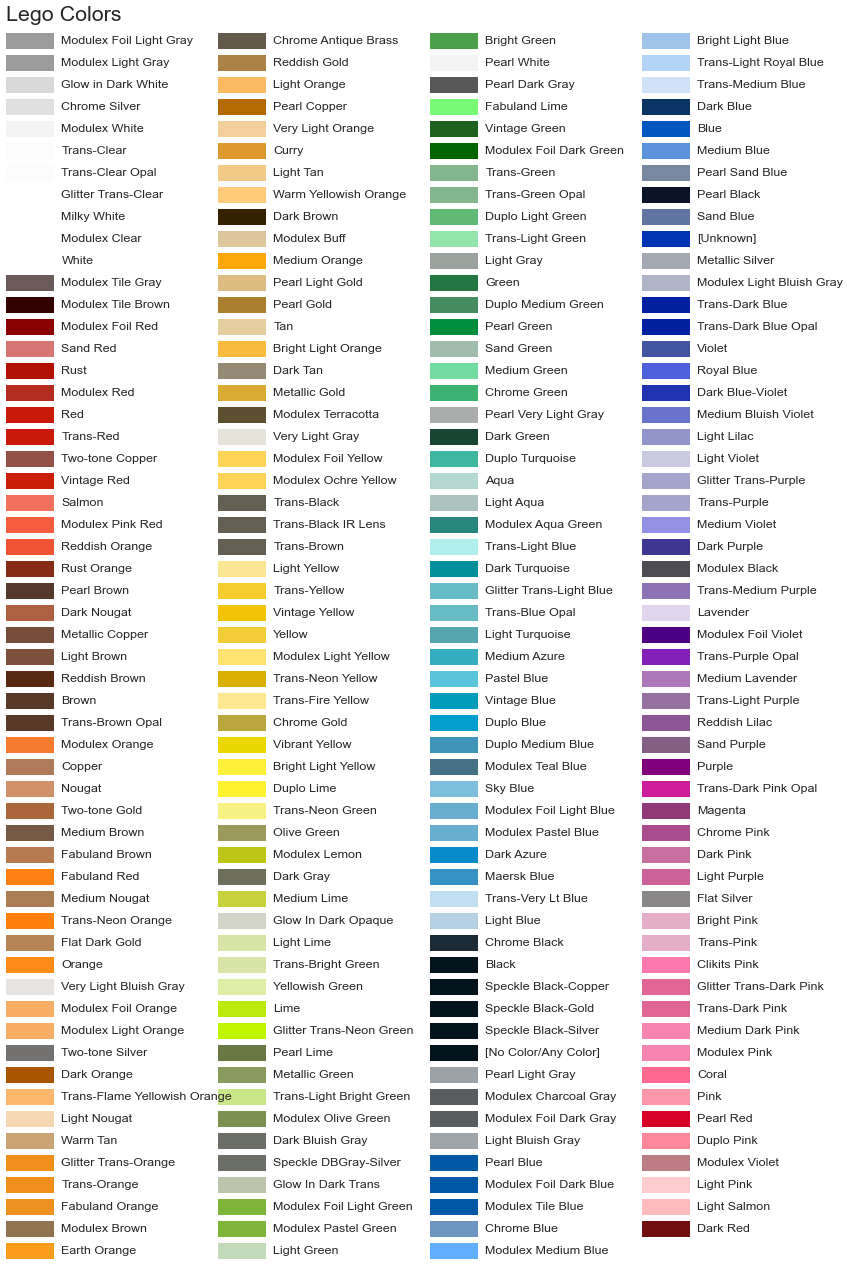

In [63]:
# Visualizar todos los colores en el dataset
import matplotlib.colors as mcolors

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 64

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(colors_set, "Lego Colors")
plt.show()

In [64]:
# Agregar rgb en theme_color
colors.rename(columns={'id': 'color_id'}, inplace=True)
color_rgb = pd.merge(Theme_color, colors, on='color_id')
color_rgb

,color_id,theme_name,name,rgb,is_trans
0,72,Gravity Games,Dark Bluish Gray,#6C6E68,f
1,72,Star Wars,Dark Bluish Gray,#6C6E68,f
2,72,Star Wars,Dark Bluish Gray,#6C6E68,f
3,72,Star Wars,Dark Bluish Gray,#6C6E68,f
4,72,Star Wars,Dark Bluish Gray,#6C6E68,f
...,...,...,...,...,...
1065225,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f
1065226,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f
1065227,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f
1065228,1089,LEGO Ideas and CUUSOO,Warm Tan,#CCA373,f


In [65]:
# Si se quisieran filtrar solo algunos themes usar el codigo comentado (se uso para correr mas rapido probando distintos graficos)
#themes_of_interest = ['Gravity Games', 'LEGO Ideas and CUUSOO', 'Star Wars', 'Friends']  
#filtered_data = color_rgb[color_rgb['theme_name'].isin(themes_of_interest)]

# Agrupar RGB por tema
#grouped_theme = filtered_data.groupby('theme_name')

# Agrupar RGB por tema
grouped_theme = color_rgb.groupby('theme_name')

# Count the frequency of each RGB code within each theme
theme_color_counts = grouped_theme['rgb'].value_counts()

# Select the top 10 colors for each theme
top_10_colors = theme_color_counts.groupby(level=0).nlargest(10)

top_10_colors_df = top_10_colors.reset_index(level=0, drop=True).reset_index(name='frequency')


In [67]:
print(f"Hay {top_10_colors_df['theme_name'].nunique()} temas distintos en el dataset")

Hay 371 temas distintos en el dataset


In [68]:
# Vamos a visualizar los 30 temas con mas piezas
grouped_df = top_10_colors_df.groupby('theme_name').agg({'frequency': 'sum'})
#grouped_df
sorted_df = grouped_df.sort_values('frequency', ascending=False)
#sorted_df
filtered_df = sorted_df.head(30) #Cambiar este valor (30) por la cantidad de temas con mayor cantidad de piezas que se quiera ver
filtered_df = filtered_df.reset_index()
theme_list = filtered_df['theme_name'].tolist()
theme_list

['Star Wars',
 'Technic',
 'Friends',
 'Ninjago',
 'Classic Town',
 'Creator 3-in-1',
 'Harry Potter',
 'City',
 'Police',
 'Ultimate Collector Series',
 'LEGO Ideas and CUUSOO',
 'Creator Expert',
 'Icons',
 'Basic Set',
 'Creator',
 'Town',
 'Monkie Kid',
 'Modular Buildings',
 'Racers',
 'Fire',
 'Brickheadz',
 'Bionicle',
 'Batman',
 'Duplo and Explore',
 'Speed Champions',
 'Minecraft',
 'Super Mario',
 'BrickLink Designer Program',
 'Construction',
 'Legends of Chima']

In [69]:
# Si se quisieran filtrar solo algunos themes usar el codigo comentado (se uso para correr mas rapido probando distintos graficos)
filtered_data = color_rgb[color_rgb['theme_name'].isin(theme_list)]

# Agrupar RGB por tema
grouped_theme = filtered_data.groupby('theme_name')

# Count the frequency of each RGB code within each theme
theme_color_counts = grouped_theme['rgb'].value_counts()

# Select the top 10 colors for each theme
top_10_colors = theme_color_counts.groupby(level=0).nlargest(10)

top_10_colors_df = top_10_colors.reset_index(level=0, drop=True).reset_index(name='frequency')

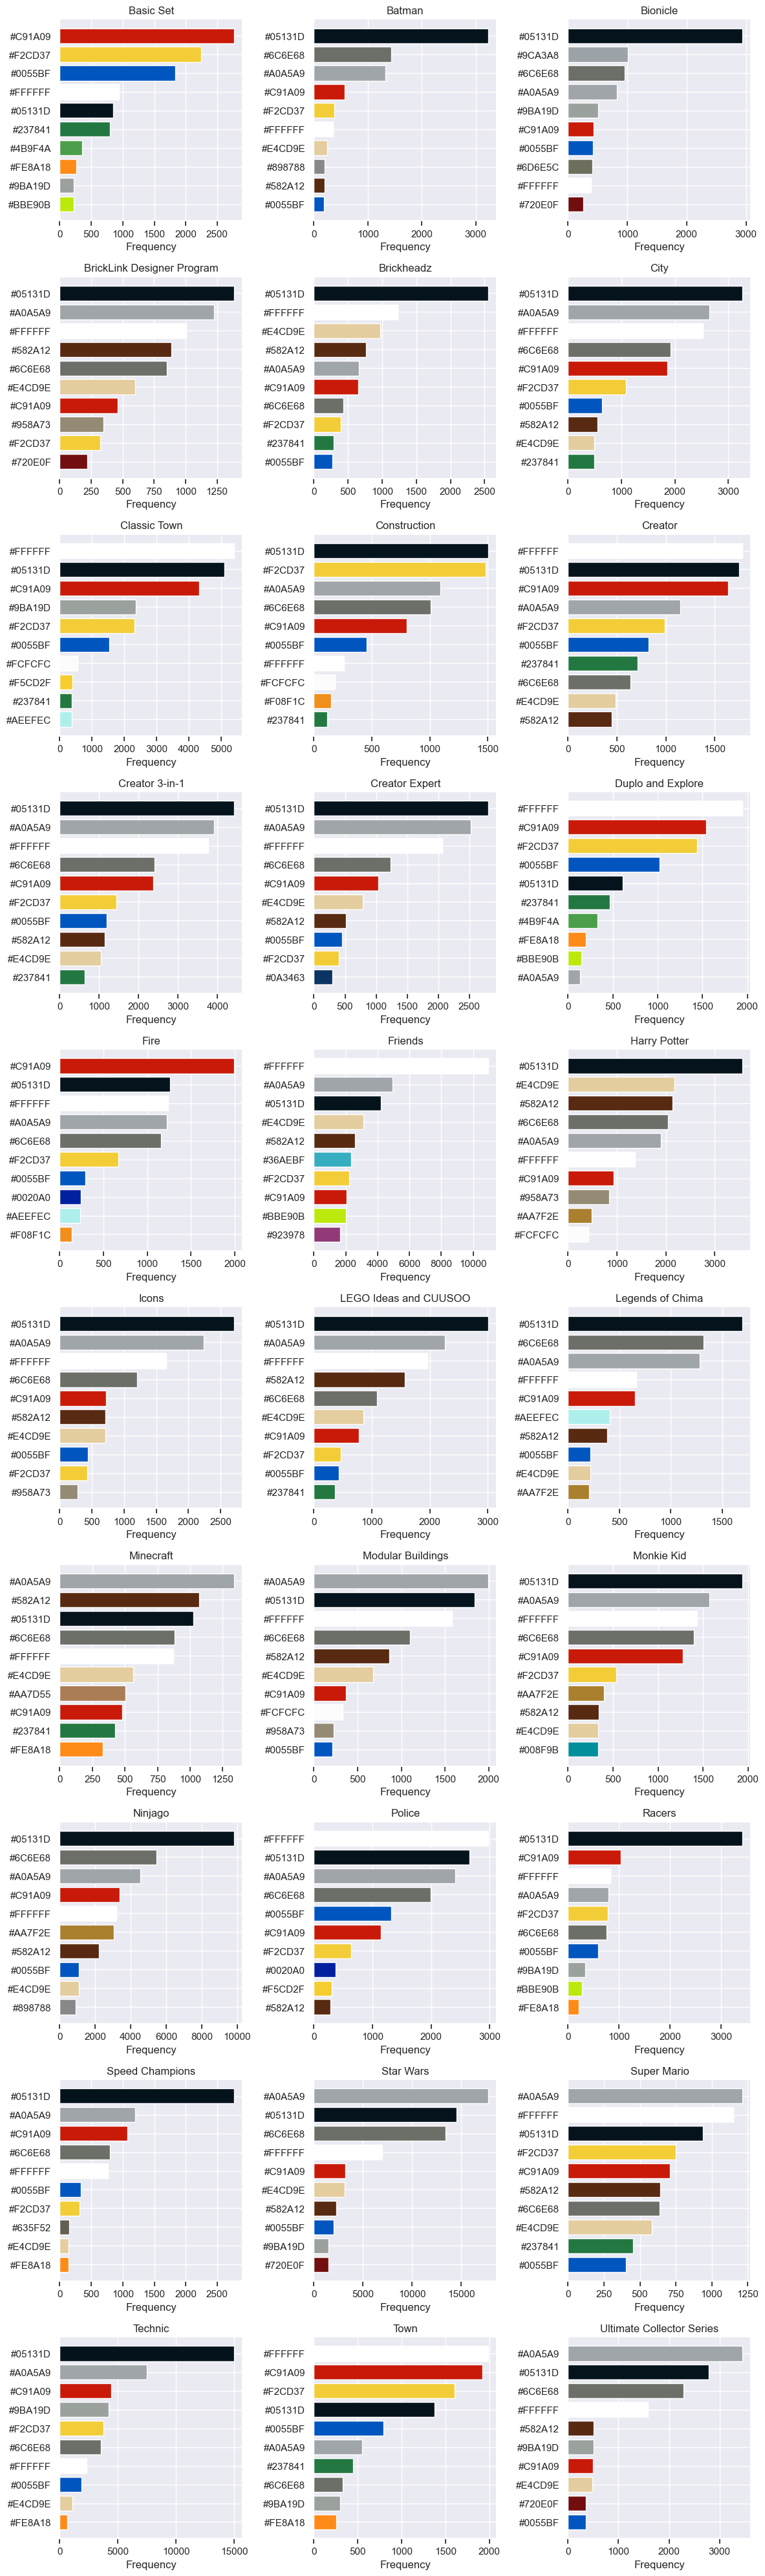

In [72]:
# Group the data by theme_name
grouped_data = top_10_colors_df.groupby('theme_name')

# Extract theme names and unique RGB codes
theme_names = list(grouped_data.groups.keys())

# Calculate the top 10 RGB codes for each theme
top_10_rgb_codes = {}
for theme_name, group in grouped_data:
    sorted_data = group.sort_values(by='frequency', ascending=False)
    top_10_data = sorted_data.head(10)
    top_10_rgb_codes[theme_name] = top_10_data['rgb'].tolist()

# Plotting the horizontal bar charts
num_charts = len(theme_names)
num_cols = 3 
num_rows = (num_charts + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=False)

for i, theme_name in enumerate(theme_names):
    row = i // num_cols
    col = i % num_cols

    theme_rgb_codes = top_10_rgb_codes[theme_name]
    group = grouped_data.get_group(theme_name)
    frequencies = group.loc[group['rgb'].isin(theme_rgb_codes), 'frequency']
    colors = group.loc[group['rgb'].isin(theme_rgb_codes), 'rgb']

    y_pos = np.arange(len(frequencies))
    axs[row, col].barh(y_pos, frequencies, align='center', color=colors)
    axs[row, col].set_yticks(y_pos)
    axs[row, col].set_yticklabels(colors)
    axs[row, col].invert_yaxis()
    axs[row, col].set_xlabel('Frequency')
    axs[row, col].set_title(theme_name)

    # Create a twin Axes object for separate x-axis scale
    axs_twin = axs[row, col].twiny()

    # Adjust x-axis limits
    max_frequency = max(frequencies)
    axs_twin.set_xlim([0, max_frequency * 1.1])  # Add a buffer of 10% to the maximum frequency for better visibility

    # Remove ticks and labels from the twin Axes
    axs_twin.set_xticks([])
    axs_twin.set_xticklabels([])

# Hide unused subplots
if num_charts < num_rows * num_cols:
    for i in range(num_charts, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()

## ¿Podría predecir a que temática pertenece un set basado en el contenido de este? 

In [73]:
parts.rename(columns={'name':'Description'}, inplace=True)

In [74]:
#num_part = number of pieces
result_part = pd.merge(result, parts, how= 'outer', on='part_num')
result_part.head(10)

,id,part_num,color_id,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material
0,1.0,48379c01,72.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004.0,460.0,5.0,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
1,738.0,48379c01,0.0,1.0,7920-1,McDonald's Sports Set Number 5 - Blue Hockey P...,2004.0,461.0,6.0,Hockey,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
2,1733.0,48379c01,1.0,1.0,7919-1,McDonald's Sports Set Number 4 - White Hockey ...,2004.0,461.0,5.0,Hockey,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
3,2304.0,48379c01,1.0,1.0,7923-1,McDonald's Sports Set Number 1 - White Soccer ...,2004.0,462.0,3.0,Soccer,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
4,3157.0,48379c01,272.0,1.0,7918-1,McDonald's Sports Set Number 8 - Green Basketb...,2004.0,459.0,5.0,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
5,7378.0,48379c01,19.0,1.0,7921-1,Gray Vest Skateboarder,2004.0,460.0,6.0,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
6,11896.0,48379c01,15.0,1.0,7924-1,McDonald's Sports Set Number 2 - Red Soccer Pl...,2004.0,462.0,3.0,Soccer,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
7,15767.0,48379c01,72.0,1.0,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004.0,459.0,5.0,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
8,1.0,48395,7.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004.0,460.0,5.0,Gravity Games,Sports Snowboard from McDonald's Promotional Set,27,Plastic
9,1.0,stickerupn0077,9999.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004.0,460.0,5.0,Gravity Games,Sticker Sheet for Set 7922-1,58,Plastic


In [75]:
result_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081957 entries, 0 to 1081956
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1065230 non-null  float64
 1   part_num       1081957 non-null  object 
 2   color_id       1065230 non-null  float64
 3   version        1065230 non-null  float64
 4   set_num        1065230 non-null  object 
 5   name           1065230 non-null  object 
 6   year           1065230 non-null  float64
 7   theme_id       1065230 non-null  float64
 8   num_parts      1065230 non-null  float64
 9   theme_name     1065230 non-null  object 
 10  Description    1081957 non-null  object 
 11  part_cat_id    1081957 non-null  int64  
 12  part_material  1081957 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 107.3+ MB


In [76]:
colorS.rename(columns={'id':'color_id', 'name':'color_name'}, inplace=True)

In [77]:
#Merge result part with colors
result_part_colorS = pd.merge(result_part, colorS, on='color_id')
result_part_colorS.drop(['is_trans'], axis=1).head()

,id,part_num,color_id,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material,color_name,rgb
0,1.0,48379c01,72.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004.0,460.0,5.0,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68
1,15767.0,48379c01,72.0,1.0,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004.0,459.0,5.0,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68
2,58.0,3003,72.0,1.0,75060-1,Slave I,2015.0,171.0,1996.0,Ultimate Collector Series,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68
3,206.0,3003,72.0,1.0,5974-1,Galactic Enforcer,2009.0,141.0,825.0,Space Police III,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68
4,432.0,3003,72.0,1.0,60139-1,Mobile Command Center,2017.0,61.0,374.0,Police,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68


In [78]:
result_part_colorS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065230 entries, 0 to 1065229
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1065230 non-null  float64
 1   part_num       1065230 non-null  object 
 2   color_id       1065230 non-null  float64
 3   version        1065230 non-null  float64
 4   set_num        1065230 non-null  object 
 5   name           1065230 non-null  object 
 6   year           1065230 non-null  float64
 7   theme_id       1065230 non-null  float64
 8   num_parts      1065230 non-null  float64
 9   theme_name     1065230 non-null  object 
 10  Description    1065230 non-null  object 
 11  part_cat_id    1065230 non-null  int64  
 12  part_material  1065230 non-null  object 
 13  color_name     1065230 non-null  object 
 14  rgb            1065230 non-null  object 
 15  is_trans       1065230 non-null  object 
dtypes: float64(6), int64(1), object(9)
memory usage: 130.0

### Tipos de variables

A continuación se hace una descripción de las variables y tipos de variables que componen el dataset **result_part_colorS**.

### Categóricas

In [85]:
# Obtener los nombres de las columnas categóricas
cat_cols = result_part_colorS.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)

Variables categóricas en el dataset:
part_num
set_num
name
theme_name
Description
part_material
color_name
rgb
is_trans


### Categóricas

Las variables categóricas encontradas en el dataset son:

#### Nominales
* Name
* Theme name
* Description
* Color name
* Part material
* RGB
* Is_trans

#### Ordinales

* Id
* Set num
* Color id
* Version
* Part cat id
* Versión
* Year

### Variables numéricas

In [86]:
# Obtener los nombres de las columnas numéricas
num_cols = result_part_colorS.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)

Variables numéricas en el dataset:
id
color_id
version
year
theme_id
num_parts
part_cat_id


Donde las variables id, color_id, theme_id y part_cat_id son variables categóricas nominales.

In [87]:
result_part_colorS.head()

,id,part_num,color_id,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material,color_name,rgb,is_trans
0,1.0,48379c01,72.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004.0,460.0,5.0,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68,f
1,15767.0,48379c01,72.0,1.0,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004.0,459.0,5.0,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68,f
2,58.0,3003,72.0,1.0,75060-1,Slave I,2015.0,171.0,1996.0,Ultimate Collector Series,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68,f
3,206.0,3003,72.0,1.0,5974-1,Galactic Enforcer,2009.0,141.0,825.0,Space Police III,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68,f
4,432.0,3003,72.0,1.0,60139-1,Mobile Command Center,2017.0,61.0,374.0,Police,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68,f


### Variables numéricas

#### Continuas

* Numero de partes

### Descripción numero de partes

/tmp/ipykernel_78357/654457491.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




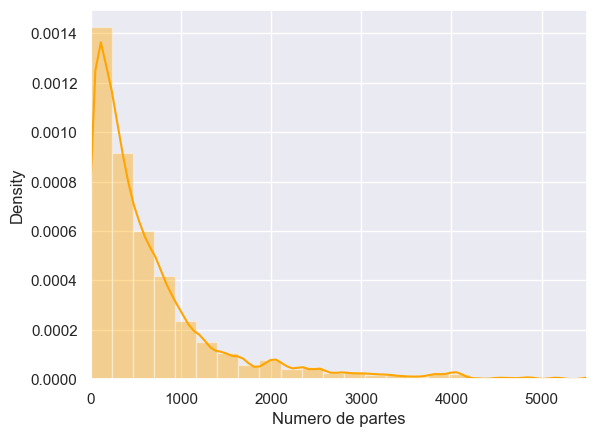

In [185]:
# Ploting num parts
sns.distplot(result_part_colorS['num_parts'], color='orange')
plt.xlim(0,5500)
plt.xlabel('Numero de partes')
plt.show()

### Descripción tipo de material

In [186]:
fq_type_material = result_part_colorS['part_material'].value_counts()
fig = px.bar(x=fq_type_material.index, y=fq_type_material.values)
fig.update_layout(
    title=dict(text="Tipo de materiales empleados en los conjuntos de Lego", font=dict(size=25), automargin=True, yref='paper')
)
fig.update_layout(xaxis_title='Tipo de material', yaxis_title='Frecuencia')
fig.show()

### Tematicas más comunes

In [238]:
fq_theme_name = pd.value_counts(result_part_colorS['theme_name'])[:15]
fig = px.bar(x=fq_theme_name.index, y=fq_theme_name.values)
fig.update_layout(
    title=dict(text="Tematicas frecuentes en Lego", font=dict(size=2), automargin=True, yref='paper')
)
fig.update_layout(xaxis_title='Tematica', yaxis_title='Frecuencia')
fig.show()

### Variables de entrada salida

A continuación se mostraran las variables de entrada salida a considerar en este trabajo:

In [187]:
#group the 'Theme_color' dataset by the 'theme_name' and count the quantity of diferente colors of the parts

pc_theme = pd.DataFrame(result_part_colorS.groupby(['theme_id', 'theme_name']).apply(lambda x: x['num_parts'].value_counts()))
pc_theme

count
theme_id theme_name    num_parts       
1.0      Technic       3599.0       670
                       836.0        639
                       3696.0       620
                       2573.0       570
                       2131.0       538
...                                 ...
746.0    Database Sets 7.0           14
                       13.0          13
                       5.0            5
                       3.0            3
                       1.0            1

[10410 rows x 1 columns]

In [ ]:
result_part_colorS.shape

(1065204, 16)

In [ ]:
result_part_colorS.isnull().sum()

id               0
part_num         0
color_id         0
version          0
set_num          0
name             0
year             0
theme_id         0
num_parts        0
theme_name       0
Description      0
part_cat_id      0
part_material    0
color_name       0
rgb              0
is_trans         0
dtype: int64